In [1]:
import sklearn.datasets
from fontTools.ttLib.tables.T_S_I__0 import table_T_S_I__0
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Zadanie 1 - Pierwszy model klasyfikacji

''' Wytrenuj model LogisticRegression na datasecie Iris i oceń jego accuracy.

Dataset: sklearn.datasets.load_iris()

Wymagania:
Podziel dane 80/20 (train/test)
Zastosuj standaryzację
Wydrukuj accuracy na zbiorze testowym
'''

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

iris = sklearn.datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

preds = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, preds)
accuracy_2 = sum(preds == y_test) / len(y_test)


'Wytrenuj model LogisticRegression na datasecie Iris i oceń jego accuracy.\n\nDataset: sklearn.datasets.load_iris()\n\nWymagania:\nPodziel dane 80/20 (train/test)\nZastosuj standaryzację\nWydrukuj accuracy na zbiorze testowym'

In [20]:
# Zadanie 2 - Porównanie trzech algorytmów

"""
Porównaj accuracy trzech algorytmów na datasecie Wine: LogisticRegression,
DecisionTree, KNN.
Dataset: sklearn.datasets.load_wine()

Wymagania:
Ten sam podział train/test dla wszystkich
Wydrukuj wyniki w formie tabeli
"""

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd

wine = load_wine()
X, y = wine.data, wine.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Rozmiar zbioru treningowego: {X_train.shape[0]}")
print(f"Rozmiar zbioru testowego: {X_test.shape[0]}")

models = {
    "LogisticRegression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=10000))
    ]),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "KNN": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", KNeighborsClassifier(n_neighbors=5))
    ]),
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    results.append([name, train_score, test_score])

df = pd.DataFrame(results, columns=["Model", "Train accuracy", "Test accuracy"])
print("\nPorównanie algorytmów:")
print(df)


SyntaxError: invalid syntax (3504950253.py, line 3)


Linear Regression:
R² (train): 0.6126
R² (test):  0.5758
RMSE: 0.7456 ($100k)
MAE:  0.5332 ($100k)


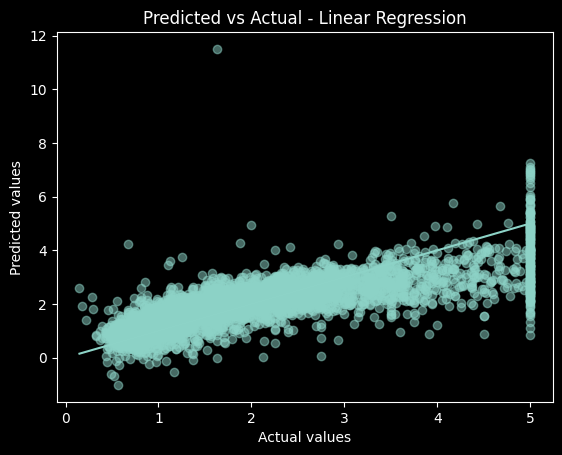

In [19]:
# Zadanie 4 - Regresja liniowa

"""
Przeprowadź regresję liniową na California Housing i oceń R².
Dataset: sklearn.datasets.fetch_california_housing()
Wymagania:
Standaryzacja cech
Oblicz RMSE i R²
Scatter plot: predicted vs actual
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

print("\nLinear Regression:")
print(f"R² (train): {r2_train:.4f}")
print(f"R² (test):  {r2:.4f}")
print(f"RMSE: {rmse:.4f} ($100k)")
print(f"MAE:  {mae:.4f} ($100k)")

plt.figure()
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Predicted vs Actual - Linear Regression")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.show()

